# Matrix Decomposition 
**FIZ353 - Numerical Analysis | 06/11/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

Any set of linear relations involving variables can be represented in different formats and -most of the time- can be solved via a number of methods. Before we delve unto some of these methods, a little revision might be useful.

## Revision of systems of linear equations

### Classification of linear systems
Any equation that contains -at most- 1st power of its variables is called a linear equation (e.g., $3x + 5y = 1$ is a _linear equation_ whereas $3x^2 + 5\sqrt y$ isn't (it is a _non-linear equation_)). If we have more than one linear equation, then we are working on a linear system. Depending on the number of <u>independent</u> equations ($n_e$) and the number of variables ($n_v$) our linear system will belong to one of these three classes:

1. **Underdetermined linear system**  
When the number of the variables ($n_v$) is greater than the number of equations ($n_e$) there will be infinite solutions. Consider the equation: $x - y = 5$ in this case any one of the pairs (-3.4, -8.4), (5,0), (6.2,1.2), (7,2), ... will satisfy the equation.
2. **Independent linear system**  
When we have $n_v = n_e$ then there is one and only one solution set, i.e., the equation will be satisfied for exactly one value of each variable. For example: $x - 3 = 5$ is satisfied only when $x=8$, likewise $3x + 2y = 8\: \&\:x - y = 1$ equations are _simultaneously_ satisfied only for (x,y) = (2,1) values.
3. **Overdetermined linear system**  
When $n_v$ < $n_e$ we have an overdetermined system where there is no solution. This kind of systems usually appear in experimental measurings. Suppose that the weight with respect to mass is measured for a specific mass. From Newton's 2nd equation: $F_g = mg$, so, we would expect to find the same reading, however, there will be a discrepancy regarding the measured weights. So, even though we have the same value for m, and fixed value for g, their product manifestation will differ a little bit for each measurement. We usually take the average of these values to transform an overdetermined linear system into an independent linear system.

### Transformation of a set of linear equations into a linear system
Usually, the physical problem at hand will be presented to be composed of some variables collected in a number of equations. Before proceeding to solve them, one must rearrange them so that the variables are ordered in the same way in each equation and the numerical value is written to the right hand side of the equation, e.g.:

\begin{align}
x - 3 &= y\\
y - 2x + 2 &= 11
\end{align}

can be rearranged into:

\begin{align}
x - y &= 3\\
-2x + y &= 9
\end{align}

### Gaussian Elimination
The most popular method to solve a linear system is the Gaussian Elimination where one equation is picked and by being multiplied by a scalar to fit the negative of the coefficient of the variable that is wanted to be eliminated in another equation and afterwards added to that equation. Take this linear system:

\begin{align}
10x_1 + 2x_2 - x_3 &= 27\quad\quad[1]\\
-3x_1 - 5x_2 + 2x_3 &= -61.5\quad[2]\\
x_1 + x_2 + 6x_3 &= -21.5\quad[3]
\end{align}

To eliminate $x_1$ in the 2nd equation, we multiply the 1st equation by -3/10 and subtract it from the 2nd equation (as we are adding/subtracting <u>an equation</u> (which in essence, has the same meaning like 2=2 or 5=5, both sides of the 2nd equation will be affected the same and even though it will become a different equation, the equality will still hold, e.g., "4 = 4" + "5 = 5" => "9 = 9" (still valid)). We do a similar thing to eliminate $x_1$ in the 3rd equation as well (multiply the 1st by 1/10 and subtract it from the 3rd).

After this modification, the equations becomes:
\begin{align}
[1]:\quad10x_1 + 2x_2 - x_3 &= 27\\
\left[[2] - \left(-{\tfrac{3} {10}}\right)\cdot[1]\right]:\quad 0 - 4.4x_2 + 1.7x_3&=-53.4\\
\left[[3] - \left({\tfrac{1} {10}}\right)\cdot[1]\right]:\quad 0 + 0.8x_2 + 6.1x_3 &= -24.2
\end{align}

Now we will use 2nd equation to eliminate $x_2$ in the 3rd equation. If we multiply the 2nd equation by $\left(\frac{0.8}{-4.4}\right)$ and subtract it from the 3rd equation:

\begin{align}
[1]:\quad10x_1 + 2x_2 - x_3 &= 27\\
[2]:\quad 0 - 4.4x_2 + 1.7x_3&=-53.4\\
\left[[3] - \left(-{\tfrac{0.8} {4.4}}\right)\cdot[2]\right]:\quad 0 + 0 + 6.41x_3 &= -33.91
\end{align}

The 3rd equation only contains $x_3$ so we can immediately calculate it:

$x_3 = \frac{-33.91}{6.41} = -5.29$

Now that we know $x_3$, substituting this value into the 2nd equation, we can find $x_2$:

$-4.4x_2 + 1.7\cdot(-5.29) = -53.4 \Rightarrow x_2 = \frac{-53.4 + 8.99}{(-4.4)} = 10.09$

and finally, substituting the newly found values of $x_2$ and $x_3$ into the 1st equation:

$10x_1 + 2\cdot(10.09) - (-5.29) = 27 \Rightarrow x_1 = 0.15$

When we were going downward, eliminating one of the variables on each run in the equations below, this process is called **forward elimination**. Then, when we reached the bottom, we had a direct equality for only a single variable and we went back to the top by substituting the found values to find the other variables. This going back process to recover all the unknowns is called **backward substitution**.

 ### Matrix Representation of Linear Systems
 We can fasten the analyzing process by representing our linear system as a matrix multiplication. Continuing with the same case, i.e.,\begin{align}
10x_1 + 2x_2 - x_3 &= 27\\
-3x_1 - 5x_2 + 2x_3 &= -61.5\\
x_1 + x_2 + 6x_3 &= -21.5
\end{align}

we can represent it, without any loss of information, as:

$$\begin{bmatrix}
10 & 2 & -1\\
-3 & -5 & 2\\
1 & 1 & 6
\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}27\\-61.5\\-21.5\end{bmatrix}$$

Therefore it is now a matrix multiplication, i.e., $A\cdot x=b$, where:

$$A=\begin{bmatrix}
10 & 2 & -1\\
-3 & -5 & 2\\
1 & 1 & 6
\end{bmatrix} \quad x=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} \quad b=\begin{bmatrix}27\\-61.5\\-21.5\end{bmatrix}$$

In [1]:
import numpy as np

A = np.array([[10., 2., -1.],[-3., -5., 2.],[1., 1., 6.]])
print("A:\n",A,"\n")

b = np.array([[27.],[-61.5],[-21.5]])
print("b:\n",b,"\n")

# Define a new matrix to store the modified values:
A2 = A 

# Multiply the first row by (-3/10) and subtract it from the second:
A2[1,:] = A[1,:] - (-3/10)*A[0,:]

# Multiply the first row by (1/10) and subtract it from the second:
A2[2,:] = A[2,:] - (1/10)*A[0,:]

# Here's the current situation:
print("A2:\n",A2,"\n")

# We need to do apply the same operations to the right hand side
# of the equation, as well:
b2 = b
b2[1] -= (-3./10.)*b2[0]
b2[2] -= ( 1./10.)*b2[0]
print("b:\n",b,"\n")

# In the next iteration, we multiply the second row by -0.8/4.4
# and subtract it from the third to eliminate x_2
A2[2,:] -= (-0.8/4.4)*A2[1,:]
b2[2] -= (-0.8/4.4)*b2[1]
print("A2:\n",A2,"\n")
print("b2:\n",b2,"\n")

# Now we can solve 
x3 = b2[2] / A[2,2]
x2 = (b2[1] - A[1,2]*x3) / A[1,1]
x1 = (b2[0] - A[0,2]*x3 - A[0,1]*x2) / A[0,0]

print ("x1: %.5f\tx2: %.5f\tx3: %.5f\n"%(x1,x2,x3))

A:
 [[10.  2. -1.]
 [-3. -5.  2.]
 [ 1.  1.  6.]] 

b:
 [[ 27. ]
 [-61.5]
 [-21.5]] 

A2:
 [[10.   2.  -1. ]
 [ 0.  -4.4  1.7]
 [ 0.   0.8  6.1]] 

b:
 [[ 27. ]
 [-53.4]
 [-24.2]] 

A2:
 [[10.          2.         -1.        ]
 [ 0.         -4.4         1.7       ]
 [ 0.          0.          6.40909091]] 

b2:
 [[ 27.        ]
 [-53.4       ]
 [-33.90909091]] 

x1: 0.15248	x2: 10.09220	x3: -5.29078



In each step, modifying both the rows of A and b is a little bit tiring, therefore we can "merge" the two to have an _augmented matrix_ for practical purposes:

$$\left[ \begin{array}{ccc|c}
10 & 2 & -1 & 27\\
-3 & -5 & 2 & -61.5\\
1 & 1 & 6 & -21.5
\end{array} \right]$$

and take it from there all at once:

In [2]:
import numpy as np
AA = np.array([[10., 2., -1., 27.],[-3., -5., 2., -61.5],[1., 1., 6.,-21.5]])
print("Initial AA:\n",AA,"\n")

AA[1,:] -= -3./10.*AA[0,:]
AA[2,:] -=  1./10.*AA[0,:]
AA[2,:] -=  -0.8/4.4*AA[1,:]
print("Eliminated AA:\n",AA,"\n")

Initial AA:
 [[ 10.    2.   -1.   27. ]
 [ -3.   -5.    2.  -61.5]
 [  1.    1.    6.  -21.5]] 

Eliminated AA:
 [[ 10.           2.          -1.          27.        ]
 [  0.          -4.4          1.7        -53.4       ]
 [  0.           0.           6.40909091 -33.90909091]] 



### Pivoting in Gaussian
It's a good strategy from precision's point of view to reorder the rows such that the diagonal elements are the ones with the greater absolute value in their column.

If we were to pivot our case example, but this time we'll assume that we had the rows interchanged to start with:
$$\left[ \begin{array}{ccc|c}
1 & 1 & 6 & -21.5\\
-3 & -5 & 2 & -61.5\\
10 & 2 & -1 & 27
\end{array} \right]$$

1. We start with the 1st column. Since 10 is the biggest number in that column, we bring it to the top and proceed with the elimination of $x_1$  
$$\left[ \begin{array}{ccc|c}
10 & 2 & -1 & 27\\
1 & 1 & 6 & -21.5\\
-3 & -5 & 2 & -61.5
\end{array} \right]$$

$$\left[ \begin{array}{ccc|c}
10 & 2 & -1 & 27\\
0 & 0.8 & 6.1 & -24.2\\
0 & -4.4 & 1.7 & -53.4
\end{array} \right]$$

2. Checking the 2nd column we have |-4.4| for the biggest number, so we swap rows 3 and 2. (Even if the 1st row had the greates number, we would be ignoring it because we can only manipulate the current row and below)
$$\left[ \begin{array}{ccc|c}
10 & 2 & -1 & 27\\
0 & -4.4 & 1.7 & -53.4\\
0 & 0.8 & 6.1 & -24.2
\end{array} \right]$$

and do the elimination for $x_2$ in the 3rd equation:

$$\left[ \begin{array}{ccc|c}
10 & 2 & -1 & 27\\
0 & -4.4 & 1.7 & -53.4\\
0 & 0 & 6.41 & -33.9
\end{array} \right]$$

...and we have arrived at the same (and most optimal) ordering that we had taken for granted in the previous section.

But what can differ by simply changing the order of the equations and then proceeding elimination? To illustrate the importance of pivoting, consider the following case:

**Example** Use Gauss elimination with and without pivoting to solve the following linear system:

$$\begin{align}
0.0003x_1 + 3.0000x_2 &= 2.0001\\
1.0000x_1 + 1.0000x_2 &= 1.0000
\end{align}$$

_**Without pivoting:**_
To eliminate x_1 in the second equation, we need to multiply the 1st equation by 1.0000/0.0003 and then subtract it:

$$1.0000/0.0003 \times \text{[1st equation]: } x_1 + 10000x_2 = 6667$$

subtract this from the 2nd equation:

$$-9999x_2 = -6666\\
x_2 = \frac{6666}{9999} = 2/3$$

Substitute this value into the 1st equation:
$$\Rightarrow x_1 = \frac{2.0001 - 3x_2}{0.0003} = \frac{2.0001 - 3(2/3)}{0.0003}$$

The obtained values for $x_1$ will be dependent on the number of significant figures taken for $x_2 = 2/3$:

In [3]:
x1_true = 1/3
print("#SF\tx2\t\t x1\t\tErr%")
for sigfig_no in range(3,8):
    formatstr = "%."+"%d"%sigfig_no+"f"
    numstr = formatstr%(2/3)
    x2 = float(numstr)
    x1 = (2.0001 - 3*x2) / 0.0003
    abs_per_rel_err_x1 = np.abs(x1_true-x1) / (x1_true) * 100
    print("%2d\t%.9f\t%12.9f\t%7.2f"%(sigfig_no,x2,x1,abs_per_rel_err_x1))
    

#SF	x2		 x1		Err%
 3	0.667000000	-3.000000000	1000.00
 4	0.666700000	 0.000000000	 100.00
 5	0.666670000	 0.300000000	  10.00
 6	0.666667000	 0.330000000	   1.00
 7	0.666666700	 0.333000000	   0.10


_**With pivoting:**_
This time, let's first proceed with pivoting. For the first column, second row has the greatest value (1 > 0.0003) so, let's rearrange:

$$\begin{align}
1.0000x_1 + 1.0000x_2 &= 1.0000\\
0.0003x_1 + 3.0000x_2 &= 2.0001
\end{align}$$

Solving once again, we multiply the 1st equation with 0.0003 and subtract it from the 2nd:

$$0.0003 \times \text{[1st equation]: } 0.0003x_1 + 0.0003x_2 = 0.0003$$

subtract this from the 2nd equation:

$$2.9997x_2 = 1.9998\\
x_2 = \frac{1.9998}{2.9997} = 2/3$$

We still get the same value for $x_2$, howeveri this time, the equation we'll substitute this value is "a little bit" different than the previous one:

Substitute this value into the 1st equation:
$$\Rightarrow x_1 = 1.0000 - x_2 = 1 - (2/3)$$

The obtained values for $x_1$ will still be dependent on the number of significant figures taken for $x_2 = 2/3$, but let's see what happens this time:

In [4]:
x1_true = 1/3
print("#SF\tx2\t\t x1\t\t   Err%")
for sigfig_no in range(3,8):
    formatstr = "%."+"%d"%sigfig_no+"f"
    numstr = formatstr%(2/3)
    x2 = float(numstr)
    x1 = (1 - x2) 
    abs_per_rel_err_x1 = np.abs(x1_true-x1) / (x1_true) * 100
    print("%2d\t%.9f\t%12.9f\t%7.2f"%(sigfig_no,x2,x1,abs_per_rel_err_x1))
  

#SF	x2		 x1		   Err%
 3	0.667000000	 0.333000000	   0.10
 4	0.666700000	 0.333300000	   0.01
 5	0.666670000	 0.333330000	   0.00
 6	0.666667000	 0.333333000	   0.00
 7	0.666666700	 0.333333300	   0.00


Thus, the precision has been greatly increased!

### LU Decomposition
Suppose that in the $A\cdot x=b$ linear system, $A$ remains fixed but b keeps changing. This can be a situation where the medium changes but the equipment remains the same, e.g., measuring the magnetic field in different parts of a room. In order to not to do all the forward elimination & backwards substition all over again when _b_ changes, we apply the LU decomposition, developed by none other than Alan Turing himself! In other words, decompose our A matrix into the multiplication of two other matrices L and U, such that L is a lower trigonal matrix and U is an upper trigonal matrix:

$$ A = L \cdot U\\
L = \begin{bmatrix}
1 & 0 & 0\\
l_{21} & 1 & 0\\
l_{31} & l_{32} & 1
\end{bmatrix},\quad
U = \begin{bmatrix}
u_{11} & u_{12} & u_{13}\\
0 & u_{22} & u_{23}\\
0 & 0 & u_{33}
\end{bmatrix}
$$

When we were applying the Gauss elimination method, we were already working on this decomposition. Remember the coefficients we multiplied the rows to subtract from the other rows to eliminate? Those were our elements of the L matrix, and the transformed part was the U matrix!

In our case study, we had:
\begin{align}10x_1 + 2x_2 - x_3 &= 27\\
-3x_1 - 5x_2 + 2x_3 &= -61.5\\
x_1 + x_2 + 6x_3 &= -21.5
\end{align}

$$\begin{bmatrix}
10 & 2 & -1\\
-3 & -5 & 2\\
1 & 1 & 6
\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}27\\-61.5\\-21.5\end{bmatrix}$$

The steps we took in elimination were as follows:
1. Multiplied the 1st eqn by -3/10 and subtracted it from the 2nd eqn.
2. Multiplied the 1st eqn by  1/10 and subtracted it from the 3rd eqn.
3. Multiplied the 2nd eqn by -0.8/4.4 and subtracted it from the 3rd eqn.

These coefficients yield the L matrix:
$$l_{21} = -3/10 = -0.3\\
l_{31} = 1/10 = 0.1\quad l_{32} = -0.8 / 4.4 = -0.18\\\\
L = \begin{bmatrix}
1 & 0 & 0\\
-3/10 & 1 & 0\\
1/10 & -0.8/4.4 & 1
\end{bmatrix}
$$

After the eliminations we had _A_ transformed into:
$$\begin{bmatrix}
10 & 2 & -1\\
0 & -4.4 & 1.7\\
0 & 0 & 6.41
\end{bmatrix}$$

which is actually our U matrix. Let's test if their multiplication indeed yields _A_:

In [5]:
import numpy as np
L = np.array([[1., 0., 0.],[-3./10., 1., 0.],[1./10.,-0.8/4.4,1.]])
U = np.array([[10., 2., -1.],[0.,-4.4, 1.7],[0.,0.,6.41]])

LU = np.dot(L,U)
print("LU:\n",LU,"\n")

LU:
 [[10.          2.         -1.        ]
 [-3.         -5.          2.        ]
 [ 1.          1.          6.00090909]] 



Thus we have verified that $A = L\cdot U$

To proceed we first solve $L\cdot z = b$ where $z$ is a column vector of unknowns $z$. Continuing with our case study:
$$
L = \begin{bmatrix}
1 & 0 & 0\\
l_{21} & 1 & 0\\
l_{31} & l_{32} & 1
\end{bmatrix}\begin{bmatrix}z_1\\z_2\\z_3\end{bmatrix}=\begin{bmatrix}27\\-61.5\\-21.5\end{bmatrix}$$

$z_1$ is directly available, and forward substituting, we also find $z_2$ and $z_3$:

$$\begin{bmatrix}z_1\\z_2\\z_3\end{bmatrix} = \begin{bmatrix}27\\-53.4\\-33.91\end{bmatrix}$$

Now we solve the $U\cdot x = z$ system:
$$\begin{bmatrix}
10 & 2 & -1\\
0 & -4.4 & 1.7\\
0 & 0 & 6.41
\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}z_1\\z_2\\z_3\end{bmatrix}$$

This time, $x_3$ is readily available, and backward substituting, we derive $x_2$ and $x_1$:

$$\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}0.15\\10.09\\-5.29\end{bmatrix}$$

Now that we have decomposed our system, even if the results ($b$) change, all we have to do is direct backward/forward substitution!

### Inverse of a matrix
Inverse of a matrix $A$ can be calculated via various ways.

**The systematical way**
1. Calculate the _matrix of minors_, $M$ whose element $m_{i,j}$ is the determinant of the minor matrice constructed from $A$ with the ith row and jth column removed.
2. Construct _matrix of cofactors_ $C$ from $M$ such that: $c_{i,j}=(-1)^{i+j}\cdot m_{i,j}$
3. Calculate the _adjoint_ of $C$: $C^{*T}$
4. Calculate $\frac{1}{\det (A)}$ (having already calculated $C$, it will be very straightforward to calculate $\det (A)$)
5. $A^{-1} = \frac{C^{*T}}{\det(A)}$

**Example:** Calculate the inverse of $A=\begin{bmatrix}
10 & 2 & -1\\
-3 & -5 & 2\\
1 & 1 & 6
\end{bmatrix}$

In [6]:
import numpy as np

def minor(arr,i,j):
    # ith row, jth column removed
    return arr[np.array(list(range(i))+list(range(i+1,arr.shape[0])))[:,np.newaxis],
               np.array(list(range(j))+list(range(j+1,arr.shape[1])))]
    # Source: https://stackoverflow.com/a/3858333

A = np.mat([[10., 2., -1.],[-3., -5., 2.],[1., 1., 6.]])
print("A:\n",A,"\n")

C = A*2
for i in range(0,3):
    for j in range(0,3):
        C[i,j] = (-1)**(i+j)*np.linalg.det(minor(A,i,j))
print("C:\n",C,"\n")
CT = C.H
print("C^*T:\n",CT,"\n")

detA = np.linalg.det(A)
print("detA: ",detA,"\n")
# or det is also:
#print(np.dot(A[0,:],np.squeeze(np.asarray(C[0,:]))))

invA = CT / detA
print("invA:\n",invA,"\n")

A:
 [[10.  2. -1.]
 [-3. -5.  2.]
 [ 1.  1.  6.]] 

C:
 [[-32.  20.   2.]
 [-13.  61.  -8.]
 [ -1. -17. -44.]] 

C^*T:
 [[-32. -13.  -1.]
 [ 20.  61. -17.]
 [  2.  -8. -44.]] 

detA:  -282.00000000000006 

invA:
 [[ 0.11347518  0.04609929  0.0035461 ]
 [-0.07092199 -0.21631206  0.06028369]
 [-0.0070922   0.02836879  0.15602837]] 



As we now have $A^{-1}$, we can directly multiply from left of both sides of the $A\cdot x = b$ equation to get:
\begin{align}A^{-1} (A\cdot x) = (A^{-1}A)x &=A^{-1}b\\
x &= A^{-1}b\end{align}


In [7]:
# Continuing from the previous code where invA was calculated
print("invA:\n",invA,"\n")

b = np.array([[27.],[-61.5],[-21.5]])
print("b\n",b,"\n")

x = invA * b
print(x)

invA:
 [[ 0.11347518  0.04609929  0.0035461 ]
 [-0.07092199 -0.21631206  0.06028369]
 [-0.0070922   0.02836879  0.15602837]] 

b
 [[ 27. ]
 [-61.5]
 [-21.5]] 

[[ 0.15248227]
 [10.09219858]
 [-5.29078014]]


### Cramer's Rule
In this method, we substitute the value column vector _b_ into the relevant column of the coefficients matrix _A_ to form the $D_i$ matrix. The unknown value is found by calculating: $$\frac{\det (D_i)}{\det (A)}$$

$$\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}$$

$$x_1 = \frac{\det\begin{bmatrix}
y_1 & a_{12} & a_{13}\\
y_2 & a_{22} & a_{23}\\
y_3 & a_{32} & a_{33}
\end{bmatrix} }{\det \begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}}
,\quad
x_2 = \frac{\det\begin{bmatrix}
a_{11} & y_1 & a_{13}\\
a_{21} & y_2 & a_{23}\\
a_{31} & y_3 & a_{33}
\end{bmatrix} }{\det \begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}},\quad ...
$$

This method is used when one needs to find not all the unknowns, but some of them.

**Example**
\begin{align}
10x_1 + 2x_2 - x_3 &= 27\\
-3x_1 - 5x_2 + 2x_3 &= -61.5\\
x_1 + x_2 + 6x_3 &= -21.5
\end{align}

$$A=\begin{bmatrix}
10 & 2 & -1\\
-3 & -5 & 2\\
1 & 1 & 6
\end{bmatrix} \quad x=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} \quad b=\begin{bmatrix}27\\-61.5\\-21.5\end{bmatrix}$$


In [8]:
import numpy as np

A = np.array([[10., 2., -1.],[-3., -5., 2.],[1., 1., 6.]])
print("A:\n",A,"\n")

b = np.array([[27.],[-61.5],[-21.5]])
print("b:\n",b,"\n")

D1 = np.copy(A)
D2 = np.copy(A)
D3 = np.copy(A)

D1[:,0] = np.transpose(b)
print("D1:\n",D1,"\n")
det_D1 = np.linalg.det(D1)

D2[:,1] = np.transpose(b)
print("D2:\n",D2,"\n")
det_D2 = np.linalg.det(D2)

D3[:,2] = np.transpose(b)
print("D3:\n",D3,"\n")
det_D3 = np.linalg.det(D3)

det_A = np.linalg.det(A)

x1 = det_D1 / det_A
x2 = det_D2 / det_A
x3 = det_D3 / det_A
print ("x1: %.5f\tx2: %.5f\tx3: %.5f\n"%(x1,x2,x3))

A:
 [[10.  2. -1.]
 [-3. -5.  2.]
 [ 1.  1.  6.]] 

b:
 [[ 27. ]
 [-61.5]
 [-21.5]] 

D1:
 [[ 27.    2.   -1. ]
 [-61.5  -5.    2. ]
 [-21.5   1.    6. ]] 

D2:
 [[ 10.   27.   -1. ]
 [ -3.  -61.5   2. ]
 [  1.  -21.5   6. ]] 

D3:
 [[ 10.    2.   27. ]
 [ -3.   -5.  -61.5]
 [  1.    1.  -21.5]] 

x1: 0.15248	x2: 10.09220	x3: -5.29078



### solve() function
`solve(A,b)` function from numpy.linalg package directly solves the $A\cdot b = x$ system of linear equations:

In [9]:
import numpy as np

A = np.array([[10., 2., -1.],[-3., -5., 2.],[1., 1., 6.]])
print("A:\n",A,"\n")

b = np.array([[27.],[-61.5],[-21.5]])
print("b:\n",b,"\n")

x = np.linalg.solve(A,b)
print("x:\n",x,"\n")

A:
 [[10.  2. -1.]
 [-3. -5.  2.]
 [ 1.  1.  6.]] 

b:
 [[ 27. ]
 [-61.5]
 [-21.5]] 

x:
 [[ 0.15248227]
 [10.09219858]
 [-5.29078014]] 



### lu() function
`LU = lu(A)` from scipy.linalg gives the LU decomposition of A

In [10]:
import numpy as np
import scipy.linalg as la
A = np.mat([[10., 2., -1.],[-3., -5., 2.],[1., 1., 6.]])
print("A:\n",A,"\n")

b = np.mat([[27.],[-61.5],[-21.5]])
print("b:\n",b,"\n")

(P,L,U)= la.lu(A)
print("L\n",L,"\n")
print("U\n",U,"\n")

z = np.linalg.solve(L,b)
print("z\n",z,"\n")
x = np.linalg.solve(U,z)
print("x\n",x,"\n")

A:
 [[10.  2. -1.]
 [-3. -5.  2.]
 [ 1.  1.  6.]] 

b:
 [[ 27. ]
 [-61.5]
 [-21.5]] 

L
 [[ 1.          0.          0.        ]
 [-0.3         1.          0.        ]
 [ 0.1        -0.18181818  1.        ]] 

U
 [[10.          2.         -1.        ]
 [ 0.         -4.4         1.7       ]
 [ 0.          0.          6.40909091]] 

z
 [[ 27.        ]
 [-53.4       ]
 [-33.90909091]] 

x
 [[ 0.15248227]
 [10.09219858]
 [-5.29078014]] 



# Eigenvalues and Eigenvectors as Decomposition

We have already seen that for an $A$ (square) matrix, we could find such a special vector $\vec{u}$ that when multiplied it returned the vector itself, scaled by a scalar $\lambda$:

$$A\cdot\vec{u} = \lambda \vec{u}$$

For such a case, the scalar $\lambda$ was called as the _eigenvalue_ and the vector $\vec{u}$ was called as the _eigenvector_. Eigenvalues and eigenvectors play a very special part in all branches of physics, most notably in Quantum Mechanics.

Now, we will treat them as a way to decompose our matrix, into a multiplication of 3 matrices, one being a diagonal matrix holding the eigenvalues and the other two being the inverse of each other. So:

$$ U^{-1}\cdot A \cdot U = D$$

and hence, equivalently:

$$ U\cdot D \cdot U^{-1} = A$$

where $U = \begin{bmatrix}\rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & &\rule[-1ex]{0.5pt}{2.5ex}\\ \vec{u}_1 & \vec{u}_2&\cdots&\vec{u}_n\\\rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex}  & &\rule[-1ex]{0.5pt}{2.5ex} \end{bmatrix}$ and $D=\begin{bmatrix}\lambda_1 & & \\ & \ddots & \\ &  & \lambda_n\end{bmatrix}$ such that:

$$A\cdot \vec{u}_i = \lambda_i\, \vec{u}_i$$

**Example**  
Consider:
$$A=\begin{bmatrix}2&3\\4&5\end{bmatrix}$$

In [11]:
A = np.array([[2,3],[4,5]])
[lambdas, U] = np.linalg.eig(A)
print("Eigenvalues: ",lambdas,"\n-----\nEigenvectors Matrix:\n",U)

Eigenvalues:  [-0.27491722  7.27491722] 
-----
Eigenvectors Matrix:
 [[-0.79681209 -0.49436913]
 [ 0.60422718 -0.86925207]]


In [12]:
D = np.diag(lambdas)
D

array([[-0.27491722,  0.        ],
       [ 0.        ,  7.27491722]])

In [13]:
# U.D.(inv(U)) ==> A
np.linalg.multi_dot((U,D,np.linalg.inv(U)))

array([[2., 3.],
       [4., 5.]])

In [14]:
#(inv(U)).A.U ==> D
np.linalg.multi_dot((np.linalg.inv(U),A,U))

array([[-2.74917218e-01,  0.00000000e+00],
       [-2.77555756e-17,  7.27491722e+00]])

## Numerical calculation of eigenvectors (not naïve, nor optimized)
Consider a zombie breakout (with cure): at every hour, 20% of the humans turn to zombies while %10 of the zombies recover and once again become human. So if the current number of humans is $h_0$ and number of zombies is $z_0$, after 1 hour, this numbers will be:

$$\begin{align*}
h_1 &= h_0\times 80\% + z_0\times 10\%\\
z_1 &= z_0\times 90\% + h_0\times 20\%
\end{align*}$$

or, rearranging the above equations into a matrix multiplication:

$$\begin{pmatrix}h_1 \\ z_1 \end{pmatrix} = \begin{bmatrix}0.80 & 0.10 \\ 0.20 & 0.90\end{bmatrix}\begin{pmatrix}h_0 \\ z_0 \end{pmatrix}$$

Let's start with a total number of 120 humans and 60 zombies:

In [15]:
h0 = 120
z0 = 60
hz0 = np.array([[h0],[z0]])

print("Hour: {:2d} | Humans # {:8.4f} | Zombies # {:8.4f}"
      .format(0,h0,z0))

trmat = np.array([[0.8, 0.1],[0.2, 0.9]])


for hour in range(1,200):
    hz1 = np.dot(trmat,hz0)
    print("Hour: {:2d} | Humans # {:8.4f} | Zombies # {:8.4f}"
      .format(hour,hz1[0,0],hz1[1,0]))
    # check if hz1 & hz0 are parallel
    cross_p = np.cross(hz0[:,0],hz1[:,0])
    if(np.linalg.norm(cross_p) < 1E-2):
        # They are parallel
        print("Found it!\n",hz1)
        break
    else:
        # continue the "evolution"
        hz0 = hz1.copy()
    

Hour:  0 | Humans # 120.0000 | Zombies #  60.0000
Hour:  1 | Humans # 102.0000 | Zombies #  78.0000
Hour:  2 | Humans #  89.4000 | Zombies #  90.6000
Hour:  3 | Humans #  80.5800 | Zombies #  99.4200
Hour:  4 | Humans #  74.4060 | Zombies # 105.5940
Hour:  5 | Humans #  70.0842 | Zombies # 109.9158
Hour:  6 | Humans #  67.0589 | Zombies # 112.9411
Hour:  7 | Humans #  64.9413 | Zombies # 115.0587
Hour:  8 | Humans #  63.4589 | Zombies # 116.5411
Hour:  9 | Humans #  62.4212 | Zombies # 117.5788
Hour: 10 | Humans #  61.6949 | Zombies # 118.3051
Hour: 11 | Humans #  61.1864 | Zombies # 118.8136
Hour: 12 | Humans #  60.8305 | Zombies # 119.1695
Hour: 13 | Humans #  60.5813 | Zombies # 119.4187
Hour: 14 | Humans #  60.4069 | Zombies # 119.5931
Hour: 15 | Humans #  60.2849 | Zombies # 119.7151
Hour: 16 | Humans #  60.1994 | Zombies # 119.8006
Hour: 17 | Humans #  60.1396 | Zombies # 119.8604
Hour: 18 | Humans #  60.0977 | Zombies # 119.9023
Hour: 19 | Humans #  60.0684 | Zombies # 119.9316


So, it means that around the 37th hour, human and the zombie population will reach to an equilibrium. 

What we did here was to interpret the transformation matrix as a rotation matrix and we kept on rotating an initial vector accordingly, until it did not rotate, meaning that it converged to an eigenvector.

As opposed to the conventional analytic solution, here we first find the eigenvector, and then we can proceed to calculate the corresponding eigenvalue:

In [16]:
hz1

array([[ 60.00011137],
       [119.99988863]])

In [17]:
Au = np.dot(trmat,hz1)

meaning that the eigenvalue is equal to 1 (as A.u = (1).u)

In [18]:
# Verification using built-in function:
[l,u] = np.linalg.eig(trmat)
print(l,"\n",u)

[0.7 1. ] 
 [[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


In [19]:
hz1.T.shape

(1, 2)

# Singular Value Decomposition (SVD)
One of the most powerful decompositions is the SVD decomposition, where an $A$ matrix (not necessarily square) is decomposed into singular vector matrices $U$, $V$ along with a diagonal $\lambda \equiv\sigma^2$ matrix:

$$A = U\cdot S\cdot V^T$$

There are many magical things involved. 8) $U$ and $V$ share the same eigenvalues $\sigma^2$, and they are orthogonal within each other. Furthermore, defining the symmetrical matrices $AA^T$ and $A^TA$, $\{u_i\} \in U$ are the eigenvectors of $AA^T$, while $\{v_i\} \in V$ are the eigenvectors of $A^TA$. Also:

$$A\cdot v_i = \sigma_i u_i$$

and

$$A=\sigma_1 u_1 v_1^T + \dots+ \sigma_r u_r v_r^T$$

where each $\sigma$ reports the "importance" of every term, so a controlled approximation is possible.

In [20]:
AS=np.array([[3,2,2],[2,3,-2]])
AS

array([[ 3,  2,  2],
       [ 2,  3, -2]])

In [21]:
[u,s,v]=np.linalg.svd(AS)
print(u,"\n",s,"\n",v)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 
 [5. 3.] 
 [[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


In [22]:
# 0.707106781 : 1/\sqrt(2)
# 0.235702260 : 1/\sqrt(18)
# 0.942809042 : 4/\sqrt(18)

In [23]:
AAT =np.dot(AS,AS.T)
AAT

array([[17,  8],
       [ 8, 17]])

In [24]:
np.dot(AAT,u[:,0])/25

array([-0.70710678, -0.70710678])

In [25]:
u[:,0]

array([-0.70710678, -0.70710678])

In [26]:
np.dot(AAT,u[:,1])/9

array([-0.70710678,  0.70710678])

In [27]:
u[:,1]

array([-0.70710678,  0.70710678])

In [28]:
c = []
tot = np.zeros((2,3))
for i in [0,1]:
    k = s[i]*np.dot(np.array([u[:,i]]).T,np.array([v[i,:]]))
    print(k)
    c.append(k)
    tot += k

[[2.50000000e+00 2.50000000e+00 1.96261557e-16]
 [2.50000000e+00 2.50000000e+00 1.96261557e-16]]
[[ 0.5 -0.5  2. ]
 [-0.5  0.5 -2. ]]


In [29]:
c

[array([[2.50000000e+00, 2.50000000e+00, 1.96261557e-16],
        [2.50000000e+00, 2.50000000e+00, 1.96261557e-16]]),
 array([[ 0.5, -0.5,  2. ],
        [-0.5,  0.5, -2. ]])]

In [30]:
tot

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

## Image compression using SVD

In [31]:
import os
os.getcwd()

'/home/sururi/ownCloud/Jupyter_notebooks/FIZ353'

In [32]:
# pip install Pillow
from PIL import Image

In [33]:
image = Image.open("data/Solvay_conference_1927.jpg")
data = np.asarray(image)
print(data.shape)

(2171, 3000)


In [34]:
print(data[0:10,0:10])

[[231 231 226 218 211 202 187 174 148 131]
 [227 228 225 219 212 202 186 171 145 130]
 [224 225 224 219 212 202 186 171 150 135]
 [224 224 222 216 211 203 189 176 162 148]
 [225 224 219 213 209 205 196 186 172 157]
 [223 222 216 210 208 208 201 193 176 161]
 [217 217 213 210 209 209 203 195 179 164]
 [211 212 212 210 211 210 203 194 183 167]
 [213 210 208 210 212 209 202 195 176 162]
 [205 205 205 209 212 209 201 194 174 162]]


In [35]:
image2 = Image.fromarray(data)
im = image2.save('../Scratch_and_Demo/saved.jpg')

In [36]:
image.mode # 'L' for greyscale

'L'

In [37]:
[u,s,vh]=np.linalg.svd(data)

In [38]:
s.shape

(2171,)

In [39]:
s

array([3.47512434e+05, 5.48806502e+04, 4.11336359e+04, ...,
       3.73601343e+00, 3.71561252e+00, 3.64186396e+00])

In [40]:
np.sum(s>100)

1020

In [41]:
np.sum(s)

1853672.188755236

In [42]:
tot = np.sum(s)
x = 70
tot_xp = tot*x/100
tot_aux = 0
for i in range(s.shape[0]):
    tot_aux += s[i]
    if(tot_aux>tot_xp):
        print(i)
        break
threshold = i  

100


In [43]:
c = np.empty(data.shape)
for i in range(threshold):
    c += s[i]*np.dot(np.array([u[:,i]]).T,np.array([vh[i,:]]))
c.shape

(2171, 3000)

In [44]:
image2 = Image.fromarray(c)
image2 = image2.convert("L")
im = image2.save('../Scratch_and_Demo/compressed_x.jpg')

In [45]:
597.8/745.2*100

80.22007514761137

In [46]:
533.4/745.2*100

71.5780998389694

## Pseudo-Inverse ($A^+$)
SVD can also be used to calculate the _pseudo-_inverse of a matrix which is not necessarily square. Given that $A$ is a $(m\times n)$ matrix, its pseudo-inverse counterpart $A^+$ will be an $(n\times m)$ matrix such that:

$$A\cdot A^+ \approx \mathbb{1}$$

where $\mathbb{1}$ is the $(m\times m)$ identity matrix (_right inverse_). A similar definition is also present for a _left inverse_ where $A^+_{(n\times m)} \cdot A_{(m\times n)} \approx \mathbb{1}_{(n\times n)}$.

Pseudo-inverse matrix can be calculated from:

$$A^+ = VD^+U^T$$

where $D^+$ indicates $\{\tfrac{1}{\sigma_i}\}$ of the non-zero elements of $D$. This equation is guaranteed to minimize the least squares error $|AA^+ - \mathbb{1}_n|_2$.

**Example**  
Pseudo-inverse of $A=\begin{bmatrix}1 & 1\\1 & 1\end{bmatrix}$

In [47]:
A = np.array([[1,1],[1,1]])
[u,s,vh] = np.linalg.svd(A)

s[s!=0] = 1/s[s!=0]
D_p = np.diag(s)
D_p

A_pinv = np.linalg.multi_dot((vh.T,D_p.T,u.T))
A_pinv

array([[0.25, 0.25],
       [0.25, 0.25]])

In [48]:
np.dot(A,A_pinv)

array([[0.5, 0.5],
       [0.5, 0.5]])

**Example**  
Pseudo-inverse of $B=\begin{bmatrix}1&2&3\\4&5&6\end{bmatrix}$

In [49]:
B = np.arange(1,7).reshape(2,3)
B

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
[u,s,vh] = np.linalg.svd(B)
print(u,"\n",s,"\n",vh)
s[s!=0] = 1/s[s!=0]
D_p = np.diag(s,-1)
D_p = D_p[[1,2],:]
print(D_p)

B_pinv = np.linalg.multi_dot((vh.T,D_p.T,u.T))
B_pinv

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]] 
 [9.508032   0.77286964] 
 [[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]
[[0.10517424 0.         0.        ]
 [0.         1.29387927 0.        ]]


array([[-0.94444444,  0.44444444],
       [-0.11111111,  0.11111111],
       [ 0.72222222, -0.22222222]])

In [51]:
np.dot(B,B_pinv)

array([[ 1.00000000e+00,  2.22044605e-16],
       [-8.88178420e-16,  1.00000000e+00]])

# Principal Component Analysis (PCA)

In [52]:
data = np.array([[ 1.    ,  4.9142],
       [ 2.    ,  7.1201],
       [ 3.    ,  8.8456],
       [ 4.    , 10.8113],
       [ 5.    , 13.2231]])

In [53]:
import matplotlib.pyplot as plt

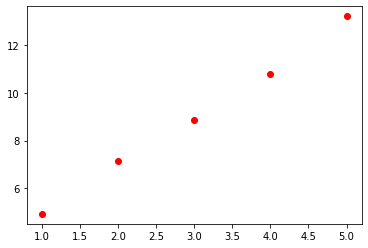

In [54]:
plt.plot(data[:,0],data[:,1],"ro")
plt.show()

In [55]:
m = np.mean(data,0)
m

array([3.     , 8.98286])

[[ 2.5         5.07725   ]
 [ 5.07725    10.34138435]]
------------
[[ 2.5         5.07725   ]
 [ 5.07725    10.34138435]]


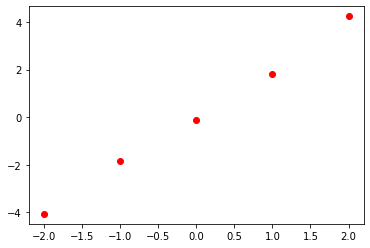

In [56]:
data_2 = data - m
S = np.dot(data_2.T,data_2)
plt.plot(data_2[:,0],data_2[:,1],"ro")
print(S/4) # 4 factos is coming from 1/(n-1)
print("------------")
Sigma = np.cov(data_2[:,0],data_2[:,1])
print(Sigma)

In [57]:
[u,s,vh]=np.linalg.svd(S)
print(u,"\n\n",s,"\n\n",vh)

[[-0.4409138  -0.89754945]
 [-0.89754945  0.4409138 ]] 

 [5.13421669e+01 2.33705196e-02] 

 [[-0.4409138  -0.89754945]
 [-0.89754945  0.4409138 ]]


$$A=U\cdot S\cdot U^T$$

In [58]:
u1=u[:,0]
u2=u[:,1]
np.dot(u1,u2)

0.0

In [59]:
u1 # principal axis

array([-0.4409138 , -0.89754945])

In [60]:
m1=u1[1]/u1[0]
m2=u2[1]/u2[0]

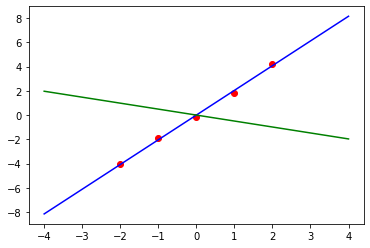

In [61]:
x=np.linspace(-4,4,30)
y1 = m1*x
y2 = m2*x
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_aspect('equal')
plt.plot(data_2[:,0],data_2[:,1],"ro",x,y1,"b-",x,y2,"g-")

plt.show()

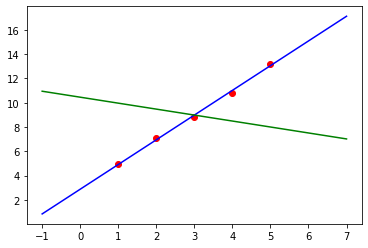

In [62]:
plt.plot(data[:,0],data[:,1],"ro",x+m[0],y1+m[1],"b-",
         x+m[0],y2+m[1],"g-")
plt.show()

In [63]:
#s1_contribution 
s[0]/np.sum(s)*100

99.95450155722494

## References & Further reading/watching:
* **Steven Chapra's Applied Numerical Methods with MATLAB: for Engineers & Scientists**
* Zach Star, ["The Applications of Matrices | What I wish my teachers told me way earlier"](https://www.youtube.com/watch?v=rowWM-MijXU)
* Luis Serrano, ["How does Netflix recommend movies? Matrix Factorization"](https://www.youtube.com/watch?v=ZspR5PZemcs)
* **Jonathan Hui, ["Machine Learning — Singular Value Decomposition (SVD) & Principal Component Analysis (PCA)"](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)**
* **Tamara Kolda, ["Tensor Decomposition"](https://www.youtube.com/watch?v=L8uT6hgMt00)**
* Tamara Kolda & Brett W. Bader, ["Tensor Decompositions and Applications", SIAM Review 51(3) 455-500 (2009)| doi: 10.1137/07070111X](http://dx.doi.org/10.1137/07070111X)
* **Gilbert Strang, ["Singular Value Decomposition"](https://www.youtube.com/watch?v=mBcLRGuAFUk)**
* EST, ["FİZ219 - Bilgisayar Programlama I | Uygulama Notları #10 : Gauss eleme yöntemi ile n bilinmeyenli n -doğrusal- denklemin çözümü"](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_10_Gauss_Eleme_Yontemi_ile_nxn_Dogrusal_Denklem_Cozumu.html)